# Data story

Objective: To analyze the given set of text message in English and predict them as spam or ham.

# Data set

The data set used for data analysis is a set of SMS tagged messages that have been collected for SMS Spam research. The set contains a total of 5,081 messages in English, tagged as being ham (legitimate) or spam. The data set has a total of 4,392 sms legitimate messages and a total of 689 spam messages. The files contain one message per line. Each line is composed of two columns: one with label (ham or spam) and other with the raw text. The data set is show below:


In [14]:
#import data from dataset
import pandas as pd
SMS_dataset = pd.DataFrame.from_csv('C:\Users\shikha\Desktop\SMSv5\SMSSpamCollection.csv', index_col=None)
print SMS_dataset.head(10)

   Type                                            Message
0   ham  @@.comGo until jurong point  crazy.. Available...
1   ham  Ok lar... Joking wif u oni...\t\t\t\t\t\t\t\t\...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf  he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
6   ham  Even my brother is not like to speak with me. ...
7   ham  As per your request 'Melle Melle (Oru Minnamin...
8  spam  WINNER!! As a valued network customer you have...
9  spam  Had your mobile 11 months or more? U R entitle...


# Operations on data set

* Removed extra tabs(\t) present in the text messages.

* Created a data set with columns:
 * Type : Type of message. value is '0' in case ham message, '1' for spam message.
 2. Message : Text message
 3. Length : Length of message
 4. Exclaim : Number of exclaimation marks in a message, column value will be updated to '0' in case of zero exclaimation     marks.
 5. Link : Value will be updated to '1' in case a website URL is present in a message else '0'  
 6. Has_large_number : Value will be updated to 1 if there is any number present in the message with more than 4 digits else value will be '0'
 7. Uppercase_letters : Number of uppercase letters in the message.

Let's hav a look at the modified data set.

In [19]:
data = pd.DataFrame.from_csv('SMS_Final_dataset.csv', index_col=None)
print data

      Unnamed: 0  Type                                            Message  \
0              0     0  @@.comGo until jurong point  crazy.. Available...   
1              1     0                      Ok lar... Joking wif u oni...   
2              2     1  Free entry in 2 a wkly comp to win FA Cup fina...   
3              3     0  U dun say so early hor... U c already then say...   
4              4     0  Nah I don't think he goes to usf  he lives aro...   
5              5     1  FreeMsg Hey there darling it's been 3 week's n...   
6              6     0  Even my brother is not like to speak with me. ...   
7              7     0  As per your request 'Melle Melle (Oru Minnamin...   
8              8     1  WINNER!! As a valued network customer you have...   
9              9     1  Had your mobile 11 months or more? U R entitle...   
10            10     0  I'm gonna be home soon and i don't want to tal...   
11            11     1  SIX chances to win CASH! From 100 to 20 000 po...   

# Histogram representation of different attributes of data set

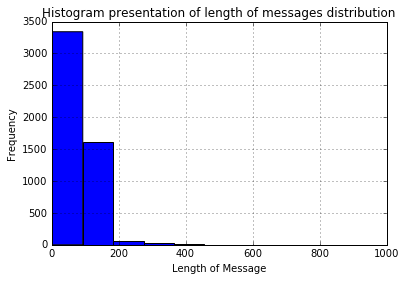

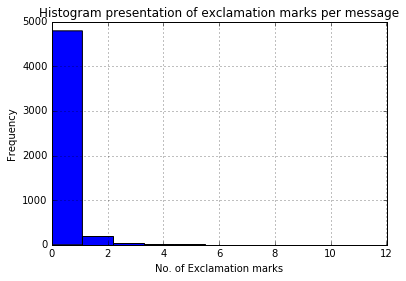

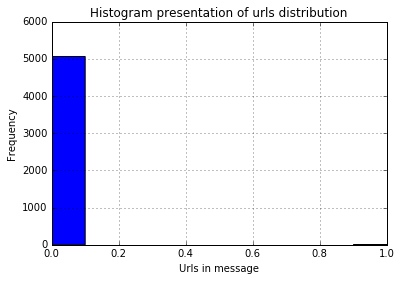

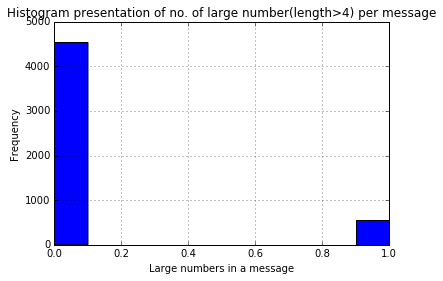

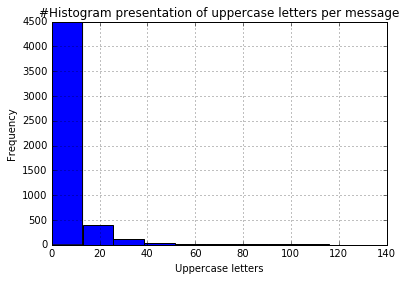

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
data.Length.hist()
plt.title('Histogram presentation of length of messages distribution')
plt.xlabel('Length of Message')
plt.ylabel('Frequency')
plt.show()

%matplotlib inline
data.Exclaim.hist()
plt.title('Histogram presentation of exclamation marks per message')
plt.xlabel('No. of Exclamation marks')
plt.ylabel('Frequency')
plt.show()


data.Link.hist()
plt.title('Histogram presentation of urls distribution')
plt.xlabel('Urls in message')
plt.ylabel('Frequency')
plt.show()


data.Has_large_number.hist()
plt.title('Histogram presentation of no. of large number(length>4) per message')
plt.xlabel('Large numbers in a message')
plt.ylabel('Frequency')
plt.show()


data.Uppercase_letters.hist()
plt.title('#Histogram presentation of uppercase letters per message')
plt.xlabel('Uppercase letters')
plt.ylabel('Frequency')
plt.show()

In [21]:
#Pairwise correlation of dataFrame columns
data.corr()

,Unnamed: 0,Type,Length,Exclaim,Link,Has_large_number,Uppercase_letters
Unnamed: 0,1.000000,-0.007290,-0.013798,0.003331,0.006927,-0.018887,0.010956
Type,-0.007290,1.000000,0.383561,0.271129,0.154681,0.869486,0.333624
Length,-0.013798,0.383561,1.000000,0.270086,0.053070,0.351609,0.383414
Exclaim,0.003331,0.271129,0.270086,1.000000,0.037555,0.261588,0.289733
Link,0.006927,0.154681,0.053070,0.037555,1.000000,0.040997,0.052138
Has_large_number,-0.018887,0.869486,0.351609,0.261588,0.040997,1.000000,0.300006
Uppercase_letters,0.010956,0.333624,0.383414,0.289733,0.052138,0.300006,1.000000


Scatter plot showing relationships between all the attributes

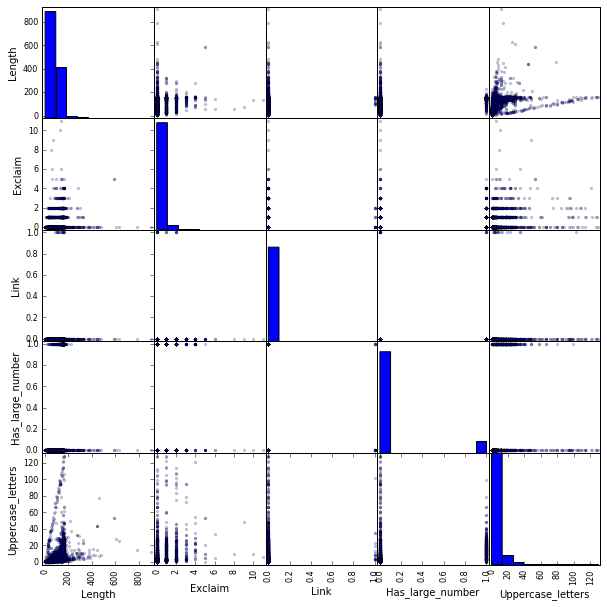

In [22]:
from pandas.tools.plotting import scatter_matrix
%matplotlib inline
X1 = data[['Length','Exclaim','Link','Has_large_number','Uppercase_letters']]
ax = scatter_matrix(X1, alpha=0.2,figsize=(10,10), diagonal='hist')

In [26]:
print(data.groupby('Type').mean())

       Unnamed: 0      Length   Exclaim      Link  Has_large_number  \
Type                                                                  
0     2544.234973   71.722222  0.178962  0.000000          0.001138   
1     2513.004354  139.149492  0.734398  0.027576          0.789550   

      Uppercase_letters  
Type                     
0              4.102914  
1             15.477504  


# Interesting facts:

* As observed from the means of both spam and ham mesages' attributes values there is a significant difference in the values. For eg. Length of a message increases at a high rate(mean 139.15) as compare to ham message(mean 71.72).

* Ham messages have significantly low chances of having website links as compare to spam messages.

* There are no links in the ham messages, that means real senders of ham messages never include link in the message.

* Long messages have higher chances of having large number of uppercase letters.

* Spam messages and large numbers has a very good correlation, this implies spam message has usually large numbers commonly in the form of phone numbers and mailbox numbers.
